### Basic QNN Prediction

In [1]:
# Imports
import warnings
import pennylane as qml
import tensorflow as tf
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
# Set keras float type
tf.keras.backend.set_floatx('float64')


In [3]:
# Configure Device
n_qubits = 1

local = False
remote_device = None
%store -r remote_device

if local:
    # Local simulator
    dev = qml.device("default.qubit", wires=n_qubits)
elif remote_device:
    dev = remote_device
else:
    # Connect to IBMQ Device
    with open('../config/token.txt', 'r') as file:
        token = file.read()

    remote_device = qml.device(
        'qiskit.ibmq', wires=1,
        backend='ibmq_armonk', ibmqx_token=token)

    %store remote_device
    dev = remote_device

In [4]:
# Define a QNode for a quantum layer with 1 qubit
tasks_executed = 0

@qml.qnode(dev)
def qnode(inputs, weights):
    global tasks_executed
    tasks_executed += 1
    print(f"Task {tasks_executed}")

    qml.templates.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.templates.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

In [5]:
# Convert QNode to keras layer
n_layers = 1
weight_shapes = {"weights": (n_layers, n_qubits)}
qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)

In [6]:
# Define classical layers
clayer_1 = tf.keras.layers.Dense(1)
clayer_2 = tf.keras.layers.Dense(2, activation="softmax")

In [7]:
# Load model from file
model = tf.keras.models.Sequential([clayer_1, qlayer, clayer_2])
model.load_weights("../output/primitive_model.tf")
model.built = True

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  0 (unused)
_________________________________________________________________
keras_layer (KerasLayer)     multiple                  0 (unused)
_________________________________________________________________
dense_1 (Dense)              multiple                  0 (unused)
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


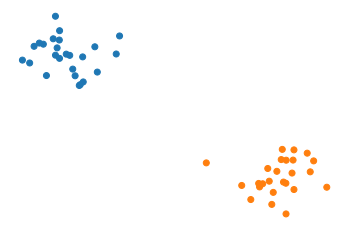

In [9]:
# Generate random data
n_samples=50

np.random.seed(42)
tf.random.set_seed(42)

x, y = make_blobs(n_samples=n_samples, n_features=2, centers=2)
y_hot = tf.keras.utils.to_categorical(y, num_classes=2)  # one-hot encoded labels

c = ["#1f77b4" if y_ == 0 else "#ff7f0e" for y_ in y]  # colours for each class
plt.axis("off")
plt.scatter(x[:, 0], x[:, 1], c=c)
plt.show()

In [10]:
# Perform prediction
y_prob = model.predict(x[:, 0])
y_class = y_prob.argmax(axis=-1)

Task 1
Task 2
Task 3
Task 4
Task 5
Task 6
Task 7
Task 8
Task 9
Task 10
Task 11
Task 12
Task 13
Task 14
Task 15
Task 16
Task 17
Task 18
Task 19
Task 20
Task 21
Task 22
Task 23
Task 24
Task 25
Task 26
Task 27
Task 28
Task 29
Task 30
Task 31
Task 32
Task 33
Task 34
Task 35
Task 36
Task 37
Task 38
Task 39
Task 40
Task 41
Task 42
Task 43
Task 44
Task 45
Task 46
Task 47
Task 48
Task 49
Task 50


C:\Users\User\anaconda3\envs\quantum-ai\lib\site-packages\pennylane_qiskit\qiskit_device.py:301: UserWarning: ibmqx_token is not a recognized runtime option and may be ignored by the backend.
  self._current_job = self.backend.run(qcirc, shots=self.shots, **self.run_args)


In [11]:
print("Tasks executed:", tasks_executed)

Tasks executed: 50


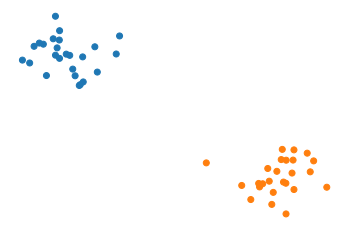

In [12]:
# Plot prediction
c = ["#1f77b4" if y_ == 0 else "#ff7f0e" for y_ in y_class]  # colours for each class
plt.axis("off")
plt.scatter(x[:, 0], x[:, 1], c=c)
plt.show()